# Clase 4 Tratamiento de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Curso Machine Learning/tratamiento_datos.csv")

In [ ]:
df.head()

,Unnamed: 0,Edad,Género,Ingresos,Altura,Ciudad,Nivel_Educación,Hijos
0,0,82,F,62297,1.96,Phoenix,None,0
1,1,15,F,38674,1.83,New York,PhD,4
2,2,166,NaN,-1886,1.87,NaN,Bachelors,-5
3,3,95,M,29759,1.77,Chicago,PhD,4
4,4,36,M,99938,1.78,Phoenix,PhD,5


In [ ]:
df.describe()

,Unnamed: 0,Edad,Ingresos,Altura,Hijos
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,53.931110,62590.579040,1.749618,1.941560
std,28867.657797,40.980893,36529.619354,0.144122,2.353844
min,0.000000,-10.000000,-2000.000000,1.500000,-5.000000
25%,24999.750000,23.000000,37658.750000,1.630000,0.000000
50%,49999.500000,51.000000,59832.000000,1.750000,2.000000
75%,74999.250000,78.000000,82207.250000,1.870000,4.000000
max,99999.000000,200.000000,199994.000000,2.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       100000 non-null  int64  
 1   Edad             100000 non-null  int64  
 2   Género           90000 non-null   object 
 3   Ingresos         100000 non-null  int64  
 4   Altura           100000 non-null  float64
 5   Ciudad           90000 non-null   object 
 6   Nivel_Educación  100000 non-null  object 
 7   Hijos            100000 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 6.1+ MB


In [ ]:
# Creo listas con el conjunto de valores de las columnas.

set_gen = set(df["Género"].to_list())
set_edu = set(df["Nivel_Educación"].to_list())
set_ciu = set(df["Ciudad"].to_list())
print(set_gen)
print(set_edu)
print(set_ciu)

{'F', 'M', nan}
{'no education', 'mastre', 'Master', 'Bachelors', 'PhD', 'pHd', 'None', 'Bachelor'}
{'Houston', 'Phoenix', 'New York', 'Chicago', 'Los Angeles', nan}


1) Tratamiento de valores negativos.

In [ ]:
df["Edad"] = df["Edad"].apply(lambda x:np.nan if x > 0 else x)
df["Ingresos"] = df["Ingresos"].apply(lambda x:np.nan if x < 0 else x)
df["Hijos"] = df["Hijos"].apply(lambda x:np.nan if x < 0 else x)

2) Imputar valores faltantes.

In [ ]:
for column in ["Edad","Ingresos","Hijos"]:
  median_value = df[column].median()
  df[column].fillna(median_value, inplace=True)

# Si yo hiciese una modificacion en panda, ej:
# df[column].fillna(median_value, inplace=True) modifica directamente el df
# de no agregar inplace=True o poner inplace=False, sera necesario guardarlo en un nuevo df:
# df = df[column].fillna(median_value)  o inplace=False.

# Reemplazo por la moda
for column in ["Género","Ciudad"]:
  mode_value = df[column].mode()[0]
  df[column].fillna(mode_value, inplace=True)

3) Mapeo de datos

In [ ]:
education_mapping = {
    "Bachelors":"Bachelor",
    "mastre":"Master",
    "pHd":"PhD",
    "no education":"NE"
}
df["Nivel_Educación"].replace(education_mapping, inplace=True)
df["Nivel_Educación"].fillna("NE",inplace=True)

4) Casteo de tipos

In [ ]:
df["Edad"] = df["Edad"].astype(int)
df["Hijos"] = df["Hijos"].astype(int)
df["Ingresos"] = df["Ingresos"].astype(float)
df["Altura"] = df["Altura"].astype(float)

In [ ]:
df

,Unnamed: 0,Edad,Género,Ingresos,Altura,Ciudad,Nivel_Educación,Hijos
0,0,-6,F,62297.0,1.96,Phoenix,None,0
1,1,-6,F,38674.0,1.83,New York,PhD,4
2,2,-6,M,62099.0,1.87,Chicago,Bachelor,2
3,3,-6,M,29759.0,1.77,Chicago,PhD,4
4,4,-6,M,99938.0,1.78,Phoenix,PhD,5
...,...,...,...,...,...,...,...,...
99995,99995,-6,M,62403.0,1.95,Houston,None,1
99996,99996,-6,F,29457.0,1.81,New York,Master,3
99997,99997,-6,M,48147.0,1.88,Houston,Master,5
99998,99998,-6,M,92826.0,1.82,New York,None,2


## Pipelines

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Curso Machine Learning/tratamiento_datos.csv", index_col=0)

In [ ]:
df

,Edad,Género,Ingresos,Altura,Ciudad,Nivel_Educación,Hijos
0,82,F,62297,1.96,Phoenix,None,0
1,15,F,38674,1.83,New York,PhD,4
2,166,NaN,-1886,1.87,NaN,Bachelors,-5
3,95,M,29759,1.77,Chicago,PhD,4
4,36,M,99938,1.78,Phoenix,PhD,5
...,...,...,...,...,...,...,...
99995,65,M,62403,1.95,Houston,None,1
99996,74,F,29457,1.81,New York,Master,3
99997,27,M,48147,1.88,Houston,Master,5
99998,39,M,92826,1.82,New York,None,2


In [ ]:
def remove_negative_values(df, column):
    df[column] = df[column].apply(lambda x: np.nan if x < 0 else x)
    return df

def remove_outliers_with_zscore(df, column, threshold=2):
    column_mean = df[column].mean()
    column_std = df[column].std()
    df[column] = df[column].mask((df[column] - column_mean) / column_std > threshold, column_mean)    # Filtraremos los datos que sean a mayor dos desviaciones estandar o menor a dos desviaciones estandar.
    return df

def map_column_values(df, column, mapping_dict):
    df[column] = df[column].apply(lambda value: mapping_dict.get(value, value))
    return df

# Rellenar los valores vacios que dejó nuestro tratamiento de datos.
def fill_na_in_column(df, column, fill_value):
    df[column].fillna(fill_value, inplace=True)
    return df

def preprocess_data(df):
    education_mapping = {
        "Bachelors": "Bachelor",
        "mastre": "Master",
        "pHd": "PhD",
        "no education": "NE"}
    gender_mapping = {
        "m": "M",
        "f": "F"}
    return (    #Aca indicamos todas las instrucciones que quiero que mi dataframe siga
        df.pipe(remove_negative_values, "Edad")   # Indicamos la funcion y el parametro, en este caso la columna
        .pipe(remove_negative_values, "Ingresos")
        .pipe(remove_negative_values, "Hijos")
        .pipe(remove_outliers_with_zscore, "Edad")
        .pipe(remove_outliers_with_zscore, "Ingresos")
        .pipe(remove_outliers_with_zscore, "Hijos")
        .pipe(map_column_values, "Nivel_Educación", education_mapping)
        .pipe(map_column_values, "Género", gender_mapping)
        .pipe(fill_na_in_column, "Ciudad", "Desconocido")     # Llenar valores perdidos (o missing values) con los que quiera. En este caso los de la columna "Ciudad" por "Desconocido"
        .pipe(fill_na_in_column, "Nivel_Educación", "Desconocido")
        .pipe(fill_na_in_column, "Género", "Desconocido")
        .pipe(fill_na_in_column, "Edad", df["Edad"].median())     # Reemplazo los valores nulos por la mediana
        .pipe(fill_na_in_column, "Hijos", df["Hijos"].median())
        .pipe(fill_na_in_column, "Ingresos", df["Ingresos"].mean())     # por el promedio
        .pipe(fill_na_in_column, "Altura", df["Altura"].mean())
    )
  # Estos campos pueden ser rellenados con cualquier valor sea la media moda mediana etc.

In [ ]:
df = preprocess_data(df)
df

,Edad,Género,Ingresos,Altura,Ciudad,Nivel_Educación,Hijos
0,82.000000,F,62297.000000,1.96,Phoenix,None,0.0
1,15.000000,F,38674.000000,1.83,New York,PhD,4.0
2,57.088505,Desconocido,60239.987315,1.87,Desconocido,Bachelor,2.0
3,95.000000,M,29759.000000,1.77,Chicago,PhD,4.0
4,36.000000,M,99938.000000,1.78,Phoenix,PhD,5.0
...,...,...,...,...,...,...,...
99995,65.000000,M,62403.000000,1.95,Houston,None,1.0
99996,74.000000,F,29457.000000,1.81,New York,Master,3.0
99997,27.000000,M,48147.000000,1.88,Houston,Master,5.0
99998,39.000000,M,92826.000000,1.82,New York,None,2.0


# Clase 5 Recopilacion y Exploracion de Datos

In [73]:
import seaborn as sns

df = sns.load_dataset('titanic')

In [74]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


¿Como se relaciona la edad con la supervivencia?

In [75]:
# 0 no sobrevivio
# 1 si sobrevivio

df.groupby("survived")["age"].mean()    # Promedio de la edad de fallecidos.

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

¿Cuantos pasajeros sobrevivieron y cuantos no?

In [76]:
# 0 no sobrevivio
# 1 si sobrevivio

df["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

¿El genero (sex) tiene alguna relacion con la supervivencia?

In [77]:
df.groupby("sex")["survived"].mean()    # Probabilidad de fallecido por genero.

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

¿La clase del boleto (pclass) tiene alguna relacion con la supervivencia?

In [78]:
df.groupby("pclass")["survived"].mean()   # Promedio de supervivencia por Clase 1, 2 y 3.

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

¿La tarifa tiene alguna relacion con la supervivencia?

In [79]:
df.groupby("survived")["fare"].mean()

survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

¿Cuantos pasajeros embarcaron en cada puerto ()variable embarked?

El puerto de embarque tiene alguna relacion con la supervivencia?

In [80]:
print (df["embarked"].value_counts())   # Personas que desembarcaron en puerto S, C y Q.
print (df.groupby("embarked")["survived"].mean())   # Promedio de supervivencia por embarque.

S    644
C    168
Q     77
Name: embarked, dtype: int64
embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


# Clase 6 Normalizacion de Datos

**Escalado**

*   Cambia rango de los datos dentro de un rango como [0,1] o bien [-1,1].
*   Algunos algoritmos de machine learning responden mejor ante datos escalados.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([[120000], [500000], [700000]])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

# Escaló los valores de data al margen de 0 y 1.

[[0.        ]
 [0.65517241]
 [1.        ]]


**Normalizado**

*   Cambia la distribucion de los datos para que tengan media 0.
*   Util cuando datos tienen diferentes escalas pero necesitamos que sigan una distribucion normal.



In [ ]:
from sklearn.preprocessing import StandardScaler

data = np.array([[3], [7], [5], [10]])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)
print(normalized_data)

[[-1.25675744]
 [ 0.29002095]
 [-0.48336824]
 [ 1.45010473]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

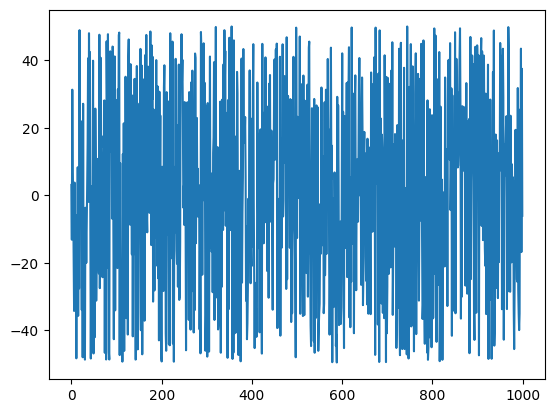

In [ ]:
data = np.random.rand(1000) * 100 - 50   # Valores de -50 a 50.
plt.plot(data)
plt.show()

**MinMaxScaler**

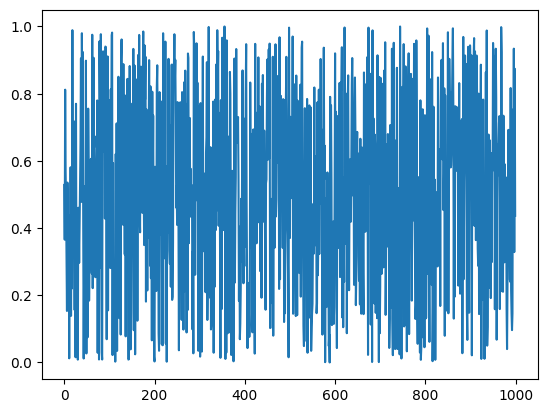

In [ ]:
def min_max_scaler(data):
  data_min = np.min(data)
  data_max = np.max(data)
  return(data - data_min) / (data_max - data_min)

norm_data = min_max_scaler(data)
plt.plot(norm_data)
plt.show;

Los datos no han cambiado sino que han cambiado su magnitud, la forma en la que estan representados.

**StandarScaler**

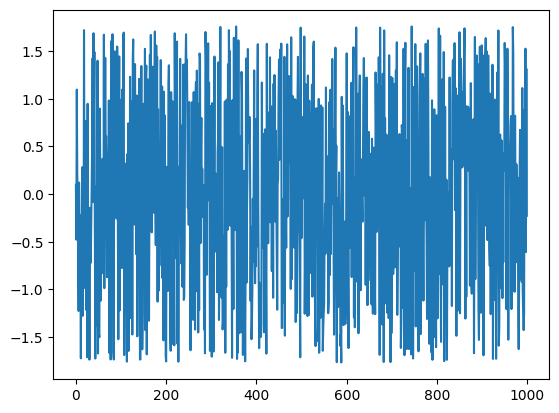

In [ ]:
def standard_scaler(data):
  mean = np.mean(data)
  std = np.std(data)
  return (data - mean) / std

std_data = standard_scaler(data)
plt.plot(std_data)
plt.show()

# Clase 07 Data Encoding

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame({
    "Cargo":["gerente","analista","asistente","gerente","analista","asistente"],
    "Departamento":["ventas","marketing","RRHH","ventas","marketing","RRHH"],
    "Ubicacion":["norte","sur","este","oeste","norte","sur"]
})
df

,Cargo,Departamento,Ubicacion
0,gerente,ventas,norte
1,analista,marketing,sur
2,asistente,RRHH,este
3,gerente,ventas,oeste
4,analista,marketing,norte
5,asistente,RRHH,sur


**OneHotEncoder**

In [20]:
from sklearn.preprocessing import OneHotEncoder   # variables dummy

# Inicializa y ajusta el modelo (OneHotEncoder)
model = OneHotEncoder()
df_model = model.fit_transform(df)
columns = model.get_feature_names_out()

# Crea un nuevo DataFrame con los nombres de las columnas dummy
df_model = pd.DataFrame(df_model.toarray(), columns=columns)
print (df_model.shape)
df_model

(6, 10)


,Cargo_analista,Cargo_asistente,Cargo_gerente,Departamento_RRHH,Departamento_marketing,Departamento_ventas,Ubicacion_este,Ubicacion_norte,Ubicacion_oeste,Ubicacion_sur
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
df_pandas = pd.get_dummies(df)
df_pandas

# Esto deberia volver el mismo dataframe dummi pero con los valores True y False, pero lo devuelve en int.

,Cargo_analista,Cargo_asistente,Cargo_gerente,Departamento_RRHH,Departamento_marketing,Departamento_ventas,Ubicacion_este,Ubicacion_norte,Ubicacion_oeste,Ubicacion_sur
0,0,0,1,0,0,1,0,1,0,0
1,1,0,0,0,1,0,0,0,0,1
2,0,1,0,1,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,1,0
4,1,0,0,0,1,0,0,1,0,0
5,0,1,0,1,0,0,0,0,0,1


In [22]:
df_pandas["Cargo_analista"].dtype

dtype('uint8')

**Label Enconder**

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
model = LabelEncoder()
df_LE = df.copy()
df_LE["Cargo"] = model.fit_transform(df_LE["Cargo"])
df_LE["Departamento"] = model.fit_transform(df_LE["Departamento"])
df_LE["Ubicacion"] = model.fit_transform(df_LE["Ubicacion"])
df_LE

# Tener en cuenta: Asignó valores por orden alfabetico
# Ej: Cargo: 0:Analista, 1:Asistente, 2:Gerente, etc.

,Cargo,Departamento,Ubicacion
0,2,2,1
1,0,1,3
2,1,0,0
3,2,2,2
4,0,1,1
5,1,0,3


Reemplazo todos los valores que teniamos por numeros ordinales

In [30]:
# Hay una forma de realizar estas lienas de codigo mas rapido

from sklearn.preprocessing import OrdinalEncoder  # Esto permite aplicar el LabelEncoder a varias variables a la vez.

model = OrdinalEncoder()

df_oe = df.copy()
df_oe[["Cargo","Departamento","Ubicacion"]] = model.fit_transform(df_oe[["Cargo","Departamento","Ubicacion"]])
df_oe

,Cargo,Departamento,Ubicacion
0,2.0,2.0,1.0
1,0.0,1.0,3.0
2,1.0,0.0,0.0
3,2.0,2.0,2.0
4,0.0,1.0,1.0
5,1.0,0.0,3.0


In [36]:
def label_encode(df, columns):
  for column in columns:
    unique_values = df[column].unique()  # Extraemos un conjunto con los valores unicos
    value_to_int = {value : i for i, value in enumerate(unique_values)}    # Convertimos los valores a integer / Recibe el indice "i" y el valor "value".
    df[column + "_encoded"] = df[column].replace(value_to_int)
  return df

df_label_custom = label_encode(df, ["Cargo","Departamento","Ubicacion"])
df_label_custom

,Cargo,Departamento,Ubicacion,Cargo_encoded,Departamento_encoded,Ubicacion_encoded
0,gerente,ventas,norte,0,0,0
1,analista,marketing,sur,1,1,1
2,asistente,RRHH,este,2,2,2
3,gerente,ventas,oeste,0,0,3
4,analista,marketing,norte,1,1,0
5,asistente,RRHH,sur,2,2,1


Generamos una clasificacion numerica a los valores de nuestras columnas.

# Clase 9 Metricas de rendimiento para Clasificacion



   **Asertividad (Accuracy)**: Se usa para medir que tan bien un modelo de clasificacion puede predecir correctamente todas las clases. En un problema de clasficiacion binaria, en el que hay dos clases posbiles, las predicciones correctas pueden caer en dos categorias:


   *   Verdaderos Positivos(TP): Cuando el modelo predice correctamente la clase positiva.
   *   Verdaderos Negativos(TN): Cuando el modelo predice correctamente la clase negativa.

  Y las incorrectas:

*   Falsos Positivos(FP): Cuando el modelo predice incorrectamente la clase positiva.
*   Falsos Negativos(FN): Cuando el modelo predice incorrectamente la clase negativa. Aun que se reduce el numero de aciertos por el modelo.










**Recall (Tasa de verdaderos positivos)**: Se enfoca especificamente en cuantas observaciones de la clase positiva nuestro modelo es capaz de capturar a traves de sus predicciones.

**Precisión**: Se enfoca en la proporcion de verdaderos positivos en relacion con todos los que el modelo ha predicho como positivos, sean correctas o no estas predicciones, incluyendo a los verdaderos positivos y falsos positivos.

**F1-Score**: Es una metrica que se usa especialmente cuando las clases estan desequilibradas, se define como la media armonica de la precision y el recall, notar que la media armonica da mas paso a los valores bajos, por lo que el modelo obtendra un F1 Score alto mientras ambas metricas son altas, esta metrica varia de 0 a 1.

**Curva ROC(Característica Operativa del Receptor)**: Grafica que muestra el rendimiento de un modelo en todos los umbrales de clasificacion, esta curva traza dos parametros:

*   Tasa de verdaderos positivos (TPR) en el eje Y (Recall)
*   Tasa de falsos positivos (FPR) en el eje X.

FPR = FP / (FP+TN)

Esta metrica viene acompañada por el AUC, area bajo la curva, que nos dice si el modelo hace sus predicciones al azar con un valor cercano al 0.5 y un modelo perfecto tendra un valor de 1.


**Matriz de Confusión**: Es una tabla que se usa para describir el rendimiento de un modelo de clasificacion en un conjunto de datos para los que se conocen los verdaderos valores.

###Matriz de confusion, precision, recall, f1_score

In [41]:
import numpy as np
from sklearn.datasets import load_iris

In [57]:
def load_dataset():
  iris = load_iris()
  X = iris.data
  y = iris.target
  return X, y

def predict_randomly(x_size, num_classes=3, seed = 42):  #Parametros: x_size:tamaño de las observaciones, num_classes: numero de clases.
  np.random.seed(seed=seed)
  return np.random.randint(num_classes, size=x_size)

def compute_confusion_matrix(y_true, y_pred):
  num_classes = len(np.unique(y_true))  # Extrae un conjunto de las etiquetas, en este caso (0,1 y 2)
  confusion_matrix = np.zeros((num_classes, num_classes))
  for true_label, pred_label in zip(y_true, y_pred):
    confusion_matrix[true_label][pred_label] += 1
  return confusion_matrix

def compute_precision(confusion_matrix):
  tp = np.diag(confusion_matrix)    # Guardamos la diagonal de Verdaderos Positivos
  fp = np.sum(confusion_matrix, axis=0) - tp    # Guardamos los Falsos positivos quitando los Verdaderos Positivos
  precision = np.mean(tp/(tp+fp))
  return precision

def compute_recall(confusion_matrix):
  tp = np.diag(confusion_matrix)
  fn = np.sum(confusion_matrix, axis=1) - tp    # Guardamos los Falsos Negativos quiando los Verdaderos Positivos (ej: Deberia haber predicho SI pero predijo NO)
  recall = np.mean(tp/(tp+fn))
  return recall

def compute_f1_score(precision, recall):
  return 2*(precision*recall)/(precision + recall)

X, y = load_dataset()
y_pred = predict_randomly(x_size=X.shape[0])
print ("Valores reales: ",y)
print ("Predicciones:   ", y_pred)

confusion_matrix = compute_confusion_matrix(y, y_pred)
print ("Matriz de confusion:")
print (confusion_matrix)

precision = compute_precision(confusion_matrix)
print ("Precision: ",precision)

recall = compute_recall(confusion_matrix)
print ("Recall: ",recall)

f1 = compute_f1_score(precision, recall)
print ("F1 Score: ",f1)

Valores reales:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Predicciones:    [2 0 2 2 0 0 2 1 2 2 2 2 0 2 1 0 1 1 1 1 0 0 1 1 0 0 0 2 2 2 1 2 1 1 2 1 2
 2 0 2 0 2 2 0 0 2 1 0 1 1 1 0 1 0 1 2 2 0 2 2 1 0 1 1 1 1 1 1 1 0 2 1 1 1
 1 1 1 2 2 1 2 0 1 0 0 1 2 0 1 0 0 0 0 2 0 0 0 2 0 0 2 2 2 0 2 2 0 2 0 1 2
 1 0 2 0 1 0 2 2 1 0 2 1 2 2 0 2 0 2 1 2 0 0 1 2 2 1 2 2 0 2 2 1 1 0 2 2 2
 0 0]
Matriz de confusion:
[[15. 15. 20.]
 [18. 21. 11.]
 [15. 10. 25.]]
Precision:  0.40515010351966874
Recall:  0.4066666666666667
F1 Score:  0.40590696853966496


¿Como interpretamos la matriz de confusion?
Las filas son los valores reales

Las columnas so las predicciones

Supongamos que estamos tratando de predecir manzanas, bananas y naranjas.

*   El modelo predijo 15 manzanas de forma correcta, 15 manzanas eran bananas, y que 20 manzanas eran naranjas.
*   Predijo que 18 bananas eran manzanas, 21 bananas eran bananas, y 11 bananas eran naranjas.
*   Predijo que 15 naranjas eran manzanas, 10 naranjas eran bananas, y 25 naranjas eran naranjas.

En resumen, nos devuelve una diagonal de Vedaderos Positivos, y los fuera de esta diagonal son Falsos Positivos que nuestro modelo ha predicho de manera erronea.





###Curva ROC

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import trapz

<ipython-input-67-5332e6404dcf>:23: DeprecationWarning: scipy.trapz is deprecated and will be removed in SciPy 2.0.0, use numpy.trapz instead
  AUC = trapz(TPR, FPR)


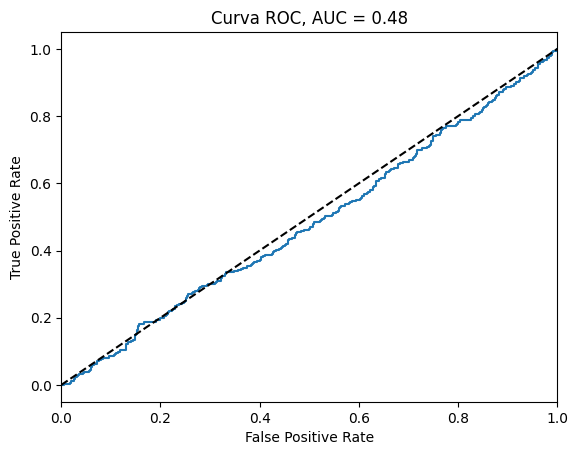

In [67]:
# Establecer la semilla aleatoria
np.random.seed(0)

# Generar etiquetas de clase
y = np.random.randint(0,2,1000)   # Generá 1000 valores al azar del 0 al 1.

# Generar puntuacion de prediccion
y_scores_random = np.random.rand(len(y))  # Generará valor del 0 al 1 de la misma longitud que y.

# ordenar puntuaciones y las verdaderas etiquetas en orden descendente de puntuacion.
sort_indices = np.argsort(y_scores_random)[::-1]
y_sorted = y[sort_indices]

# Calcular Verdaderos Positivos y Falsos Positivos acumulados.
TP_cumsum = np.cumsum(y_sorted)
FP_cumsum = np.cumsum(1-y_sorted)

# Calcular TPR y FPR
TPR = TP_cumsum / TP_cumsum[-1]
FPR = FP_cumsum / FP_cumsum[-1]

# Calcular AUC (Area Bajo la Curva)
AUC = trapz(TPR, FPR)

# Plot curva ROC
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],"k--")
plt.xlim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"Curva ROC, AUC = {AUC:.2f}")
plt.show()

Nuestra area bajo la curva es de 0.48, si nuestro modelo tiene un roc y area bajo la curva de 0.5 quiere decir que el modelo no es muy bueno, significaria que esta haciendo predicciones al azar.

# Clase 10 Metricas de rendimiento para regresion

¿Que es el error? En Clasificacion vimos que un error es cuando el modelo da un falso positivo o negativo, pero *en regresion el error se entiende como una diferencia entre el valor teorico y el valor predicho.*

**Error Cuadrático (SE)**: Es la suma de los cuadrados de los errores

**Error Cuadrático Medio (MSE)**: Es el promedio de los cuadrados de los errores.

**Raíz del error cuadrático medio (RMSE)**: Es la raiz cuadrada del promedio de los cuadrados de los errores.

**Error Absoluto Medio (MAE)**: Es el promedio de los valores absolutos de los errores.

**Coeficiente de determinación**: Indica cuanta variacion de los datos puede ser explicada por el modelo, un valor 1 significa que el modelo puede explicar toda la variabilidad de los datos.

*   El numerador representa la suma de los cuadrados de los errores, es decir, la suma de las diferencias entre los valores teoricos y el valor predicho
*   El denominador representa la suma total de los cuadrados, es decir, la suma de las diferencias entre los valores teoricos y el promedio de estos.



In [69]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [90]:
# Cargar el dataset
data = pd.read_csv("/content/drive/MyDrive/Curso Machine Learning/Salary_Data.csv")

# Separar las caracteristicas y el target
X = data[["YearsExperience"]]
y = data[["Salary"]]

# Dividir por prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# CALCULAR METRICAS DE RENDIMIENTO

# Error Cuadratico
EC = ((y_test - y_pred)**2).sum()

# Error Cuadratico Medio
ECM = EC/len(y_test)

# Raiz del Error Cuadratico Medio
RMSE = ECM ** 0.5

# Error Absoluto Medio
EAM = abs(y_test - y_pred).mean()

# Coeficiente de determinacion Rcuadrado
residuos = y_test - y_pred
explained_variance = residuos.var()
total_variance = y_test.var()
R2 = 1 - (explained_variance/total_variance)

print ("EC: ", EC[0])
print ("ECM: ", ECM[0])
print ("RMSE: ", RMSE[0])
print ("EAM: ", EAM[0])
print ("R2: ", R2[0])

# R2 de 0.97 significa nuestro modelo es capas de explicar un 97% de la variacion de los datos.

EC:  144719433.16398555
ECM:  24119905.527330924
RMSE:  4911.2020450528125
EAM:  3973.827455052182
R2:  0.979639652565227
